In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df=pd.read_csv('C:/cea/PycharmProjects/EDA/ML/customer.csv')
df.head()

,customer_id,Age,Churn,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,FrequentFlyer,CustomerLoyaltyScore,Gender
0,AIC1099,34,No,Middle Income,Exclusive Travel Package,No,Yes,No,0.0,NaN
1,AIC8182,34,Yes,Low Income,Ultimate Travel Package,Yes,No,Yes,5.0,Male
2,AIC4163,37,No,Middle Income,Premium Travel Package,Yes,No,No,0.0,Female
3,AIC7636,30,No,Middle Income,Standard Travel Package,No,No,No,0.0,Male
4,AIC7867,30,No,Low Income,Basic Travel Package,No,No,No,0.0,Female


In [46]:
df.tail()

,customer_id,Age,Churn,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,FrequentFlyer,CustomerLoyaltyScore,Gender
949,AIC9892,31,No,Low Income,Basic Travel Package,No,No,Yes,1.0,Female
950,AIC3539,30,No,Middle Income,Ultimate Travel Package,No,Yes,No,0.0,Male
951,AIC9595,37,No,Middle Income,Luxury Travel Package,No,No,No,0.0,Female
952,AIC0560,30,No,Low Income,Basic Travel Package,Yes,Yes,No,0.0,NaN
953,AIC4708,31,No,High Income,Basic Travel Package,No,No,Yes,1.0,Male


In [47]:
df.dtypes

customer_id                    object
Age                             int64
Churn                          object
AnnualIncomeClass              object
ServicesOpted                  object
AccountSyncedToSocialMedia     object
BookedHotelOrNot               object
FrequentFlyer                  object
CustomerLoyaltyScore          float64
Gender                         object
dtype: object

In [48]:
df.isna().sum()

customer_id                    0
Age                            0
Churn                          0
AnnualIncomeClass              0
ServicesOpted                  0
AccountSyncedToSocialMedia     0
BookedHotelOrNot               0
FrequentFlyer                 60
CustomerLoyaltyScore          60
Gender                        47
dtype: int64

In [49]:
df['Churn'].value_counts()

Churn
No     730
Yes    224
Name: count, dtype: int64

In [50]:
# df.dropna(inplace=True,ignore_index=True)

In [51]:
df.isna().sum()

customer_id                    0
Age                            0
Churn                          0
AnnualIncomeClass              0
ServicesOpted                  0
AccountSyncedToSocialMedia     0
BookedHotelOrNot               0
FrequentFlyer                 60
CustomerLoyaltyScore          60
Gender                        47
dtype: int64

In [52]:
df.shape

(954, 10)

In [53]:
df['FrequentFlyer'].unique()

array(['No', 'Yes', nan], dtype=object)

In [54]:
df['FrequentFlyer']=df['FrequentFlyer'].fillna(df['FrequentFlyer'].mode()[0])

In [55]:
df['Gender'].unique()

array([nan, 'Male', 'Female'], dtype=object)

In [56]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])

In [57]:
df['CustomerLoyaltyScore'].unique()

array([ 0.,  5.,  1., nan,  4.,  6.,  3.,  2.])

In [58]:
df['CustomerLoyaltyScore']=df['CustomerLoyaltyScore'].fillna(df['CustomerLoyaltyScore'].mode())[0]

In [59]:
df.drop('customer_id',axis=1,inplace=True)

In [60]:
df.isna().sum()

Age                           0
Churn                         0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
FrequentFlyer                 0
CustomerLoyaltyScore          0
Gender                        0
dtype: int64

In [61]:
obj=[i for i in df.columns if df[i].dtypes==object]
obj

['Churn',
 'AnnualIncomeClass',
 'ServicesOpted',
 'AccountSyncedToSocialMedia',
 'BookedHotelOrNot',
 'FrequentFlyer',
 'Gender']

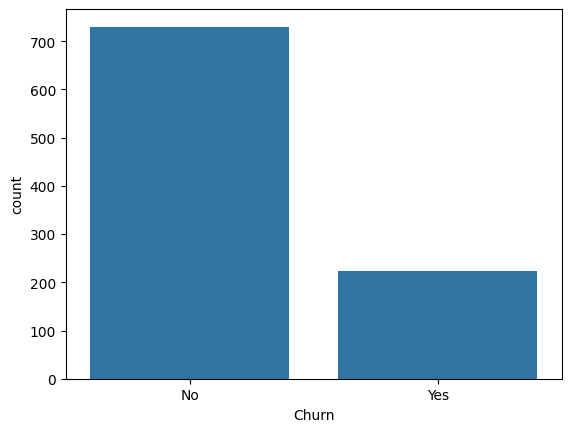

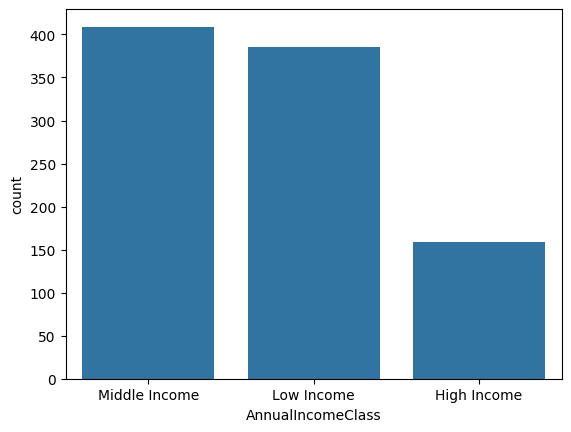

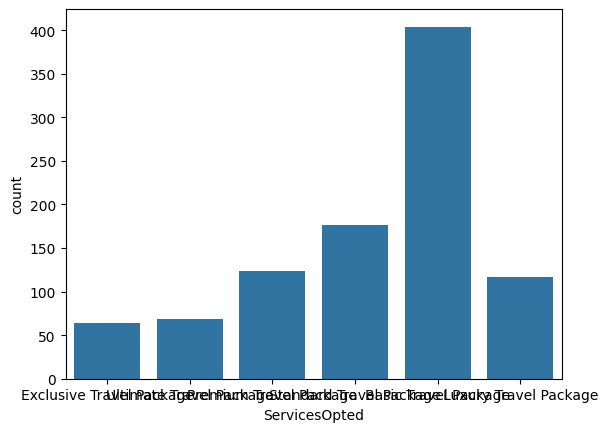

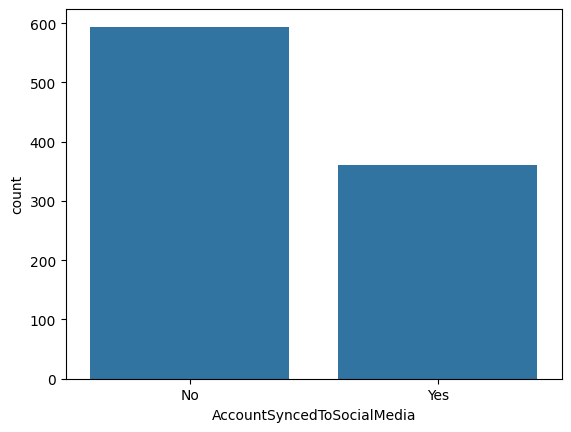

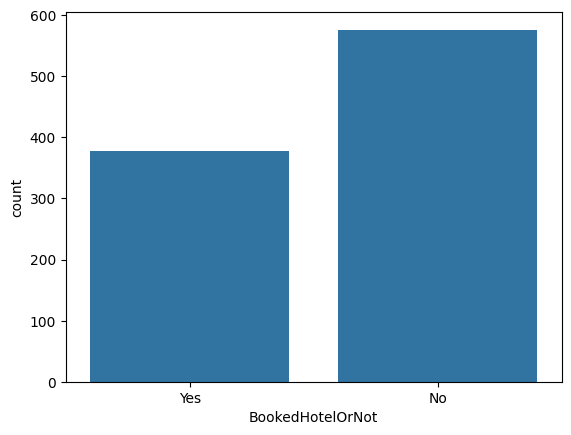

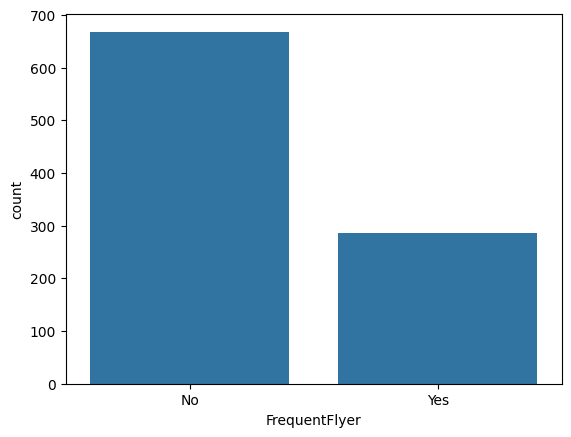

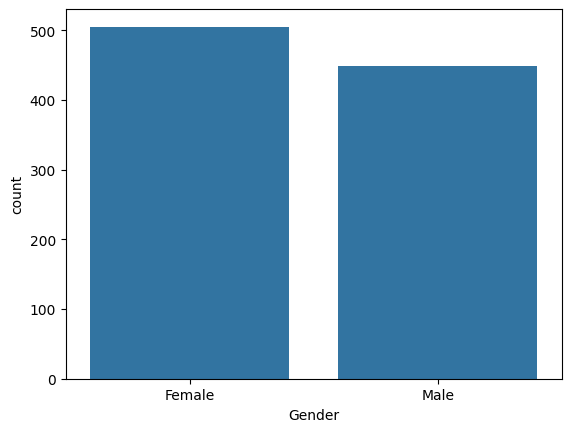

In [62]:
for i in obj:
    sns.countplot(x=df[i])
    plt.show()

In [63]:
num=[i for i in df.columns if i not in obj]
num

['Age', 'CustomerLoyaltyScore']

In [65]:
df1=pd.get_dummies(df[['AnnualIncomeClass','ServicesOpted','AccountSyncedToSocialMedia','BookedHotelOrNot','FrequentFlyer','Gender']],dtype=int,drop_first=True)

In [66]:
df_final=pd.concat([df,df1],axis=1)

In [67]:
df_final.columns

Index(['Age', 'Churn', 'AnnualIncomeClass', 'ServicesOpted',
       'AccountSyncedToSocialMedia', 'BookedHotelOrNot', 'FrequentFlyer',
       'CustomerLoyaltyScore', 'Gender', 'AnnualIncomeClass_Low Income',
       'AnnualIncomeClass_Middle Income',
       'ServicesOpted_Exclusive Travel Package',
       'ServicesOpted_Luxury Travel Package',
       'ServicesOpted_Premium Travel Package',
       'ServicesOpted_Standard Travel Package',
       'ServicesOpted_Ultimate Travel Package',
       'AccountSyncedToSocialMedia_Yes', 'BookedHotelOrNot_Yes',
       'FrequentFlyer_Yes', 'Gender_Male'],
      dtype='object')

In [68]:
df_final.drop(['AnnualIncomeClass','ServicesOpted','AccountSyncedToSocialMedia','BookedHotelOrNot','FrequentFlyer','Gender'],axis=1,inplace=True)

In [69]:
df_final.head()

,Age,Churn,CustomerLoyaltyScore,AnnualIncomeClass_Low Income,AnnualIncomeClass_Middle Income,ServicesOpted_Exclusive Travel Package,ServicesOpted_Luxury Travel Package,ServicesOpted_Premium Travel Package,ServicesOpted_Standard Travel Package,ServicesOpted_Ultimate Travel Package,AccountSyncedToSocialMedia_Yes,BookedHotelOrNot_Yes,FrequentFlyer_Yes,Gender_Male
0,34,No,0.0,0,1,1,0,0,0,0,0,1,0,0
1,34,Yes,0.0,1,0,0,0,0,0,1,1,0,1,1
2,37,No,0.0,0,1,0,0,1,0,0,1,0,0,0
3,30,No,0.0,0,1,0,0,0,1,0,0,0,0,1
4,30,No,0.0,1,0,0,0,0,0,0,0,0,0,0


In [70]:
x=df_final.drop(columns=['Churn']).values
x

array([[34.,  0.,  0., ...,  1.,  0.,  0.],
       [34.,  0.,  1., ...,  0.,  1.,  1.],
       [37.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [37.,  0.,  0., ...,  0.,  0.,  0.],
       [30.,  0.,  1., ...,  1.,  0.,  0.],
       [31.,  0.,  0., ...,  0.,  1.,  1.]])

In [71]:
y=df_final['Churn'].values

In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [73]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [79]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [80]:
knn=KNeighborsClassifier(n_neighbors=7)
nb=BernoulliNB()
sv=SVC()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
models=[knn,nb,sv,dt,rf]

In [82]:

for model in models:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f"model is {model}")
    print(f"accuracy score is {accuracy_score(y_test,y_pred)}")
    print(f"classification_report is {classification_report(y_test,y_pred)}")
    print("*"*50)
    

model is KNeighborsClassifier(n_neighbors=7)
accuracy score is 0.8815331010452961
classification_report is               precision    recall  f1-score   support

          No       0.89      0.96      0.93       219
         Yes       0.84      0.62      0.71        68

    accuracy                           0.88       287
   macro avg       0.87      0.79      0.82       287
weighted avg       0.88      0.88      0.87       287

**************************************************
model is BernoulliNB()
accuracy score is 0.7700348432055749
classification_report is               precision    recall  f1-score   support

          No       0.85      0.85      0.85       219
         Yes       0.51      0.51      0.51        68

    accuracy                           0.77       287
   macro avg       0.68      0.68      0.68       287
weighted avg       0.77      0.77      0.77       287

**************************************************
model is SVC()
accuracy score is 0.8501742160278746


In [83]:
matrix=confusion_matrix(y_test,y_pred)
matrix

array([[213,   6],
       [ 22,  46]])